<a href="https://colab.research.google.com/github/PatthananVachirathatthira/CN334-Django-recap/blob/main/SF251_Pytorch_and_Neural_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
print("Using torch", torch.__version__)

Using torch 2.6.0+cu124


# Tensor

## From Python to PyTorch

In [33]:
# First, let's import necessary libraries
import numpy as np

# Python List
python_list = [1, 2, 3, 4]
print("Python List:", python_list)

# NumPy Array
numpy_array = np.array([1, 2, 3, 4])
print("NumPy Array:", numpy_array)

# PyTorch Tensor
torch_tensor = torch.tensor([1, 2, 3, 4])
print("PyTorch Tensor:", torch_tensor)

Python List: [1, 2, 3, 4]
NumPy Array: [1 2 3 4]
PyTorch Tensor: tensor([1, 2, 3, 4])


## Tensor Dimensions Visualization

In [32]:
# 0D Tensor (Scalar)
scalar = torch.tensor(5)
print("0D Tensor (Scalar):")
print(scalar)
print("Shape:", scalar.shape)

0D Tensor (Scalar):
tensor(5)
Shape: torch.Size([])


In [31]:
# 1D Tensor (Vector)
vector = torch.tensor([1, 2, 3, 4])
print("1D Tensor (Vector):")
print(vector)
print("Shape:", vector.shape)

1D Tensor (Vector):
tensor([1, 2, 3, 4])
Shape: torch.Size([4])


In [30]:
# 2D Tensor (Matrix)
matrix = torch.tensor([[1, 2, 3],
                      [4, 5, 6]])
print("2D Tensor (Matrix):")
print(matrix)
print("Shape:", matrix.shape)

2D Tensor (Matrix):
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])


In [29]:
# 3D Tensor (Cube)
cube = torch.tensor([[[1, 2],
                     [3, 4]],
                    [[5, 6],
                     [7, 8]]])
print("3D Tensor (Cube):")
print(cube)
print("Shape:", cube.shape)

3D Tensor (Cube):
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])


## Tensor Properties

In [28]:
# Create a tensor
t = torch.tensor([[1, 2, 3],
                 [4, 5, 6]], dtype=torch.float32)

# Basic properties
print("\nTensor Properties:")
print("Shape:", t.shape)
print("Data Type:", t.dtype)
print("Device:", t.device)
print("Requires Gradient:", t.requires_grad)


Tensor Properties:
Shape: torch.Size([2, 3])
Data Type: torch.float32
Device: cpu
Requires Gradient: False


# Computational Graph and Auto Grad

In [ ]:
# Basic Example 1
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)
print(x)

y = x+2
print(y)

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.], grad_fn=<AddBackward0>)


In [ ]:
!pip install torchviz

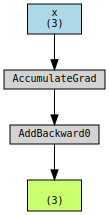

In [ ]:
from torchviz import make_dot

graph = make_dot(y, params={"x": x})
graph

In [35]:
# Basic example 2
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Operations create the computational graph
z = x * y
w = z + x

# Compute gradients
w.backward()

print(f"x.grad: {x.grad}")  # dw/dx = y + 1
print(f"y.grad: {y.grad}")  # dw/dy = x

x.grad: 4.0
y.grad: 2.0


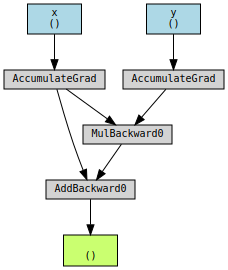

In [36]:
# Create tensors
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define computation
z = x * y
w = z + x

# Visualize the graph
graph = make_dot(w, params={"x": x, "y": y})
graph

### Computational Example 3

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum.

In [37]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [38]:
# Build the graph
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


Using the statements above, we have created a computation graph that looks similar to the figure below:

<center style="width: 100%"><img src="https://raw.githubusercontent.com/phlippe/uvadlc_notebooks/refs/heads/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg" width="200px"></center>

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [39]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:`

In [40]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

## Gradient Accumulation Example

In [41]:
# Create tensor with gradient tracking
x = torch.tensor(1.0, requires_grad=True)

# Multiple operations
y = x + 2
z = y * y * 2

# Compute gradients
z.backward()
print(f"First gradient: {x.grad}")  # dz/dx

# Gradients accumulate by default
z = y * y * 2
z.backward()
print(f"Accumulated gradient: {x.grad}")  # dz/dx  + dz/dx

First gradient: 12.0
Accumulated gradient: 24.0


In [42]:
# Reset gradients
x.grad.zero_()
print(f"After reset: {x.grad}")  # 0

After reset: 0.0


The following is the typically loop pattern that we will encounter.

In [43]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)
  #weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


## Backpropagation

In [44]:
# Simple linear regression

x = torch.tensor(1.0)
y = torch.tensor(2.0) # y = 2*x

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

# update w
# keep going

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Linear Regression Example

In [45]:
# Pytorch version 1

# f = 2 * x
X = torch.tensor([1.0, 2.0, 3.0, 4.0])
Y = torch.tensor([2.0, 4.0, 6.0, 8.0])

w = torch.tensor(0.0, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward() # dl/dw

  # update weights
  with torch.no_grad():
    w -= (learning_rate*w.grad)

  # zero gradients
  w.grad.zero_()

  print(f'epoch {epoch+1}: w ={w:.3f}, loss = {l:.5f}')

print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w =0.300, loss = 30.00000
epoch 2: w =0.555, loss = 21.67500
epoch 3: w =0.772, loss = 15.66019
epoch 4: w =0.956, loss = 11.31449
epoch 5: w =1.113, loss = 8.17472
epoch 6: w =1.246, loss = 5.90623
epoch 7: w =1.359, loss = 4.26725
epoch 8: w =1.455, loss = 3.08309
epoch 9: w =1.537, loss = 2.22753
epoch 10: w =1.606, loss = 1.60939
epoch 11: w =1.665, loss = 1.16279
epoch 12: w =1.716, loss = 0.84011
epoch 13: w =1.758, loss = 0.60698
epoch 14: w =1.794, loss = 0.43854
epoch 15: w =1.825, loss = 0.31685
epoch 16: w =1.851, loss = 0.22892
epoch 17: w =1.874, loss = 0.16540
epoch 18: w =1.893, loss = 0.11950
epoch 19: w =1.909, loss = 0.08634
epoch 20: w =1.922, loss = 0.06238
epoch 21: w =1.934, loss = 0.04507
epoch 22: w =1.944, loss = 0.03256
epoch 23: w =1.952, loss = 0.02353
epoch 24: w =1.960, loss = 0.01700
epoch 25: w =1.966, loss = 0.01228
epoch 26: w =1.971, loss = 0.00887
epoch 27: w =1.975, loss = 0.00641
epoch 28: w =1.979,

### Full Pytorch Linear Regression

1) Design model (input, output size, forward pass)

2) Construct loss and Optimizer

3) Training loop:
  - forward pass: compute prediction
  - backward pass: gradients
  - update weights

### Custom Linear Regression Model

How to create models in pytorch
- Create a class which inherit `nn.Module`
- define layers in `__init__`
- Implement forward method

In [47]:
import torch.nn as nn

In [48]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super().__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

In [50]:
model = LinearRegression(1, 1)
# Printing a module shows all its submodules
print(model)

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)


In [51]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter lin.weight, shape torch.Size([1, 1])
Parameter lin.bias, shape torch.Size([1])


In [52]:
# f = 2 * x
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]]) # new shape
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])
X_test = torch.tensor([5.0])

input_size = 1
output_size = 1

class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super().__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 50

## Loss and optimizer
loss = nn.MSELoss() # loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  [w,b] = model.parameters()
  print(f'epoch {epoch+1}: w ={w[0][0].item():.3f}, loss = {l:.5f}')

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 3.760
epoch 1: w =0.979, loss = 12.14167
epoch 2: w =1.138, loss = 8.42702
epoch 3: w =1.270, loss = 5.84949
epoch 4: w =1.381, loss = 4.06099
epoch 5: w =1.472, loss = 2.81997
epoch 6: w =1.549, loss = 1.95884
epoch 7: w =1.613, loss = 1.36131
epoch 8: w =1.666, loss = 0.94668
epoch 9: w =1.711, loss = 0.65897
epoch 10: w =1.748, loss = 0.45932
epoch 11: w =1.779, loss = 0.32077
epoch 12: w =1.804, loss = 0.22463
epoch 13: w =1.826, loss = 0.15790
epoch 14: w =1.844, loss = 0.11159
epoch 15: w =1.859, loss = 0.07944
epoch 16: w =1.871, loss = 0.05712
epoch 17: w =1.882, loss = 0.04162
epoch 18: w =1.890, loss = 0.03086
epoch 19: w =1.898, loss = 0.02338
epoch 20: w =1.904, loss = 0.01817
epoch 21: w =1.909, loss = 0.01455
epoch 22: w =1.913, loss = 0.01203
epoch 23: w =1.917, loss = 0.01026
epoch 24: w =1.920, loss = 0.00903
epoch 25: w =1.922, loss = 0.00816
epoch 26: w =1.925, loss = 0.00755
epoch 27: w =1.926, loss = 0.00711
epoch 28: w =1.928, lo

# Simple Neuron Network in Pytorch

1) DataLoader, Transformation

2) Multilayer Neural Net, Activation Function

3) Loss and Optimizer

4) Training Loop (batch training)

5) Model Evaluation

6) GPU support

## Feed Forward Neuron Network

In [53]:
# Example of a Feedforward Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(784, 300, 10)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=300, out_features=10, bias=True)
)


In [54]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter fc1.weight, shape torch.Size([300, 784])
Parameter fc1.bias, shape torch.Size([300])
Parameter fc2.weight, shape torch.Size([10, 300])
Parameter fc2.bias, shape torch.Size([10])


In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Full code Example

In [56]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # 0.1307 is the mean of all MNIST training image and 0.3081 is standard deviation
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True,
    transform=transform,
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform)

# Data loader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# Feedforward Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop
total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], '
                  f'Loss: {loss.item():.4f}')

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    # Store metrics
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Loss: {epoch_loss:.4f}, '
          f'Accuracy: {epoch_acc:.2f}%')

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]


Epoch [1/5], Step [100/600], Loss: 0.1833
Epoch [1/5], Step [200/600], Loss: 0.1748
Epoch [1/5], Step [300/600], Loss: 0.1384
Epoch [1/5], Step [400/600], Loss: 0.1799
Epoch [1/5], Step [500/600], Loss: 0.1148
Epoch [1/5], Step [600/600], Loss: 0.0547
Epoch [1/5], Loss: 0.2231, Accuracy: 93.41%
Epoch [2/5], Step [100/600], Loss: 0.1135
Epoch [2/5], Step [200/600], Loss: 0.0401
Epoch [2/5], Step [300/600], Loss: 0.0613
Epoch [2/5], Step [400/600], Loss: 0.1756
Epoch [2/5], Step [500/600], Loss: 0.0566
Epoch [2/5], Step [600/600], Loss: 0.1271
Epoch [2/5], Loss: 0.0883, Accuracy: 97.33%
Epoch [3/5], Step [100/600], Loss: 0.0508
Epoch [3/5], Step [200/600], Loss: 0.0204
Epoch [3/5], Step [300/600], Loss: 0.0350
Epoch [3/5], Step [400/600], Loss: 0.0227
Epoch [3/5], Step [500/600], Loss: 0.0850
Epoch [3/5], Step [600/600], Loss: 0.0376
Epoch [3/5], Loss: 0.0582, Accuracy: 98.19%
Epoch [4/5], Step [100/600], Loss: 0.0688
Epoch [4/5], Step [200/600], Loss: 0.0591
Epoch [4/5], Step [300/600],

Accuracy of the network on the 10000 test images: 97.80%


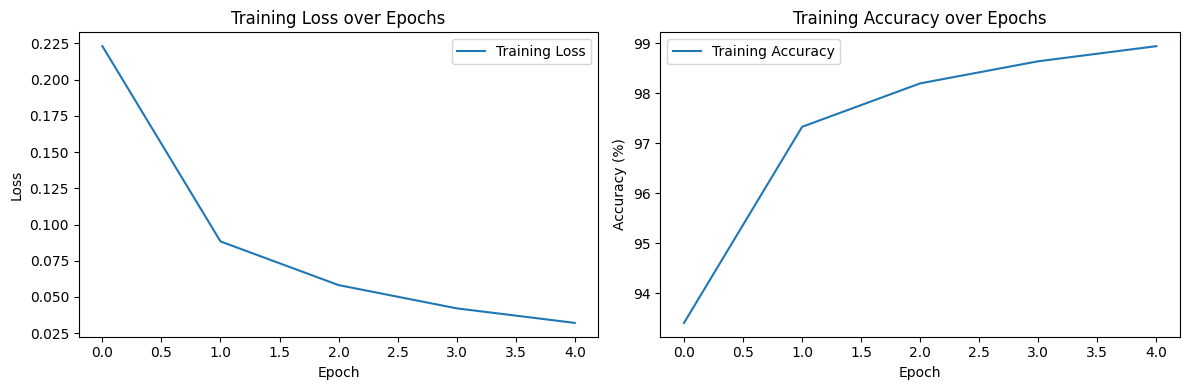

In [57]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

# Plotting training metrics
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
torch.save(model.state_dict(), 'mnist_ffn.pth')

# Exercise: FashionMNIST

In [58]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [59]:
# Hyperparameter
batch_size = 100

# Data Loader
# FashionMNIST Classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# FashionMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))  # FashionMNIST mean and std
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    transform=transform
)

# Data loader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.27MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.56MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.0MB/s]


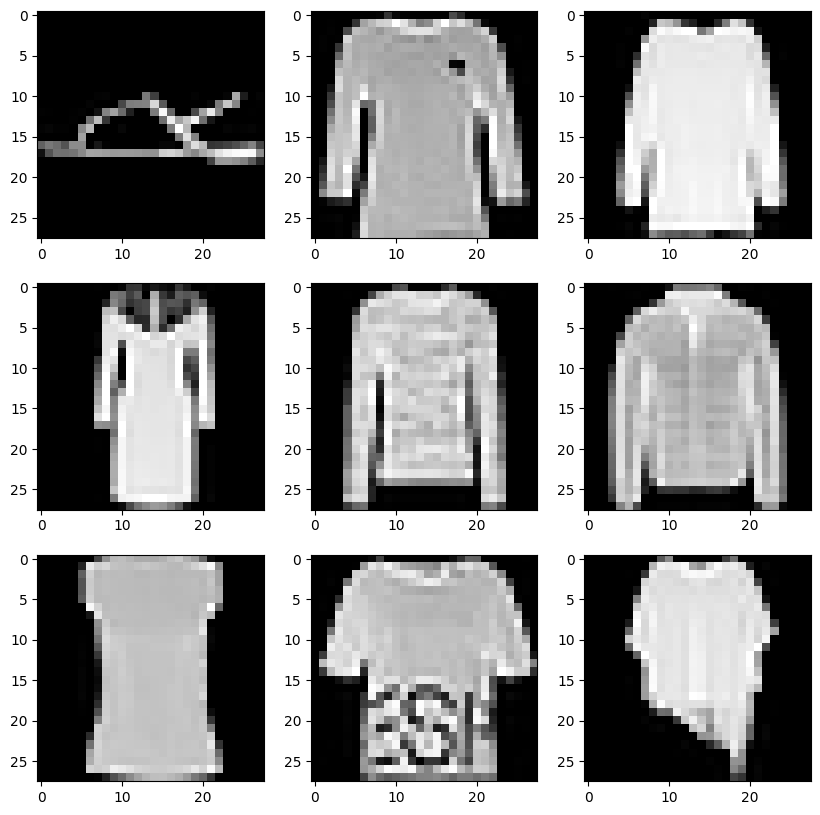

In [62]:
# Visualize data
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.squeeze(), cmap='gray')

# Get some random train images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Print images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    imshow(images[i])

Model Part
- Exercise: Update this code
- Feel free to add more layers

In [63]:
# Hyperparameters
input_size = 784  # 28x28
hidden_size1 = 850
hidden_size2 = 550
num_classes = 9
learning_rate = 0.001 # something very small
num_epochs = 5

# Feedforward Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        # Update here too!
        return out

model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=850, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=850, out_features=550, bias=True)
  (fc3): Linear(in_features=550, out_features=9, bias=True)
)


Training Part

In [64]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop
total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], '
                  f'Loss: {loss.item():.4f}')

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    # Store metrics
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Loss: {epoch_loss:.4f}, '
          f'Accuracy: {epoch_acc:.2f}%')

Epoch [1/5], Step [100/600], Loss: 0.6523
Epoch [1/5], Step [200/600], Loss: 0.7190
Epoch [1/5], Step [300/600], Loss: 0.4940
Epoch [1/5], Step [400/600], Loss: 0.5622
Epoch [1/5], Step [500/600], Loss: 0.5327
Epoch [1/5], Step [600/600], Loss: 0.4433
Epoch [1/5], Loss: 0.5954, Accuracy: 80.68%
Epoch [2/5], Step [100/600], Loss: 0.6925
Epoch [2/5], Step [200/600], Loss: 0.4822
Epoch [2/5], Step [300/600], Loss: 0.3536
Epoch [2/5], Step [400/600], Loss: 0.4584
Epoch [2/5], Step [500/600], Loss: 0.4118
Epoch [2/5], Step [600/600], Loss: 0.5601
Epoch [2/5], Loss: 0.4469, Accuracy: 84.47%
Epoch [3/5], Step [100/600], Loss: 0.4286
Epoch [3/5], Step [200/600], Loss: 0.3322
Epoch [3/5], Step [300/600], Loss: 0.5074
Epoch [3/5], Step [400/600], Loss: 0.4875
Epoch [3/5], Step [500/600], Loss: 0.4710
Epoch [3/5], Step [600/600], Loss: 0.4691
Epoch [3/5], Loss: 0.4289, Accuracy: 85.09%
Epoch [4/5], Step [100/600], Loss: 0.3376
Epoch [4/5], Step [200/600], Loss: 0.4623
Epoch [4/5], Step [300/600],

Testing Part

Overall Accuracy of the network on the test images: 84.16%
Accuracy of T-shirt/top: 85.50%
Accuracy of Trouser: 95.50%
Accuracy of Pullover: 74.40%
Accuracy of Dress: 86.40%
Accuracy of Coat: 74.70%
Accuracy of Sandal: 92.40%
Accuracy of Shirt: 50.90%
Accuracy of Sneaker: 91.80%
Accuracy of Bag: 94.60%
Accuracy of Ankle boot: 95.40%


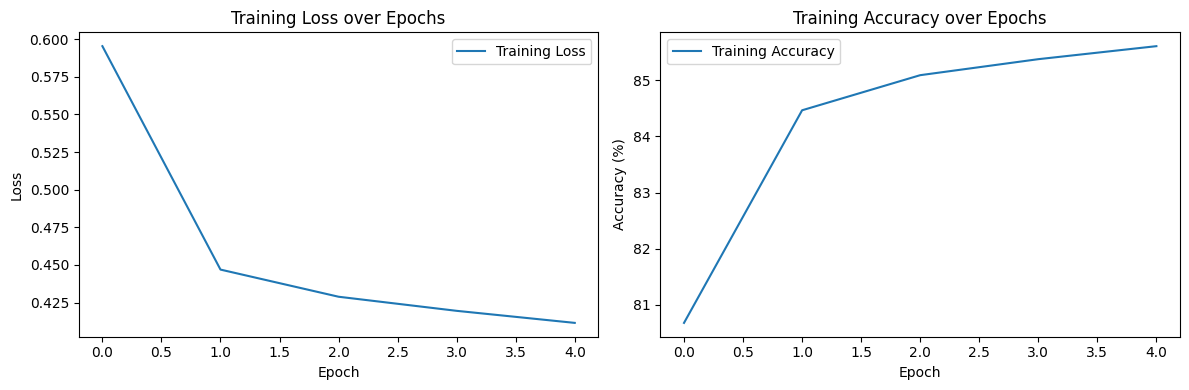

In [65]:
# Test the model
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Calculate per-class accuracy
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

    print(f'Overall Accuracy of the network on the test images: {100 * correct / total:.2f}%')

    # Print accuracy for each class
    for i in range(10):
        print(f'Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')

# Plotting training metrics
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

Visualization

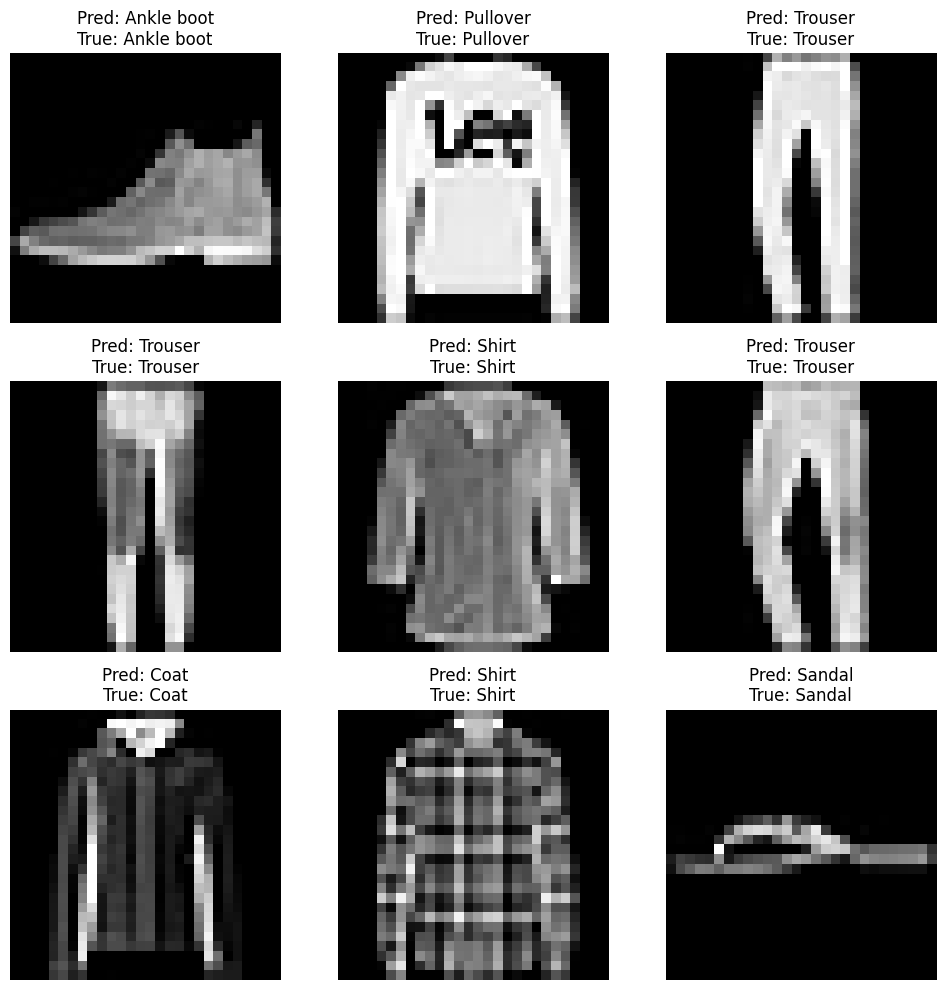

In [66]:
# Visualize some predictions
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.squeeze(), cmap='gray')

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Print images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    imshow(images[i])

    # Get predictions
    image = images[i].reshape(-1, 28*28).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    plt.title(f'Pred: {classes[predicted[0]]}\nTrue: {classes[labels[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()